In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 

### Capital Bikeshare Data
https://ride.capitalbikeshare.com/system-data
### We deal with data from Jan to Apr in 2022

In [191]:
# Read csv files
df_Jan=pd.read_csv('202201-capitalbikeshare-tripdata.csv')
df_Feb=pd.read_csv('202202-capitalbikeshare-tripdata.csv')
df_Mar=pd.read_csv('202203-capitalbikeshare-tripdata.csv')
df_Apr=pd.read_csv('202204-capitalbikeshare-tripdata.csv')

In [192]:
# Concat the above Data Set
df=pd.concat([df_Jan,df_Feb,df_Mar,df_Apr])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828621 entries, 0 to 310434
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             828621 non-null  object 
 1   rideable_type       828621 non-null  object 
 2   started_at          828621 non-null  object 
 3   ended_at            828621 non-null  object 
 4   start_station_name  792027 non-null  object 
 5   start_station_id    792027 non-null  float64
 6   end_station_name    786251 non-null  object 
 7   end_station_id      786251 non-null  float64
 8   start_lat           828621 non-null  float64
 9   start_lng           828621 non-null  float64
 10  end_lat             827170 non-null  float64
 11  end_lng             827170 non-null  float64
 12  member_casual       828621 non-null  object 
dtypes: float64(6), object(7)
memory usage: 88.5+ MB


In [193]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,38.822738,-77.049265,member
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,38.898243,-77.026235,member
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,38.903819,-77.028400,member
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.915604,-76.983683,38.901385,-76.941877,casual
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.0,Pennsylvania Ave & Park Ave,32603.0,38.885434,-77.173605,38.887403,-77.176992,member


### Below is transformation from time to Date

In [194]:
# Transform Time to Date 
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

In [195]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_date,ended_at_date
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,38.822738,-77.049265,member,2022-01-06,2022-01-06
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,38.898243,-77.026235,member,2022-01-31,2022-01-31
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,38.903819,-77.028400,member,2022-01-07,2022-01-07
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.915604,-76.983683,38.901385,-76.941877,casual,2022-01-27,2022-01-27
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.0,Pennsylvania Ave & Park Ave,32603.0,38.885434,-77.173605,38.887403,-77.176992,member,2022-01-07,2022-01-07


### Below is Transformation from Time to Hours

In [196]:
# Transform time to Hour
df['started_at_hour'] = pd.to_datetime(df['started_at']).dt.hour
df['ended_at_hour'] = pd.to_datetime(df['ended_at']).dt.hour

In [197]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_date,ended_at_date,started_at_hour,ended_at_hour
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,38.822738,-77.049265,member,2022-01-06,2022-01-06,18,18
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,38.898243,-77.026235,member,2022-01-31,2022-01-31,19,19
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,38.903819,-77.028400,member,2022-01-07,2022-01-07,15,15
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.915604,-76.983683,38.901385,-76.941877,casual,2022-01-27,2022-01-27,20,20
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.0,Pennsylvania Ave & Park Ave,32603.0,38.885434,-77.173605,38.887403,-77.176992,member,2022-01-07,2022-01-07,16,16


## Below are codes for "21st & I St NW" pick-up based on date

### Count daily pickups

In [198]:
# Group and get pickup occurrence for 21st & I St NW
df_sub1 = df[df['start_station_name']=="21st & I St NW"]
df_grp1 = df_sub1.groupby(['started_at_date','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")
df_pu

,started_at_date,start_station_name,pu_ct
0,2022-01-01,21st & I St NW,7
1,2022-01-02,21st & I St NW,5
2,2022-01-04,21st & I St NW,2
3,2022-01-05,21st & I St NW,5
4,2022-01-06,21st & I St NW,10
...,...,...,...
113,2022-04-26,21st & I St NW,49
114,2022-04-27,21st & I St NW,67
115,2022-04-28,21st & I St NW,58
116,2022-04-29,21st & I St NW,69


## Below are codes for "21st & I St NW" drop-off based on date





In [199]:
# Group and get drop off occurrence for 21st & I St NW
df_sub2 = df[df['end_station_name']=="21st & I St NW"]
df_grp2 = df_sub2.groupby(['ended_at_date','end_station_name']).size()
df_do=df_grp2.reset_index(name = "do_ct")
df_do

,ended_at_date,end_station_name,do_ct
0,2022-01-01,21st & I St NW,5
1,2022-01-02,21st & I St NW,5
2,2022-01-04,21st & I St NW,6
3,2022-01-05,21st & I St NW,5
4,2022-01-06,21st & I St NW,10
...,...,...,...
113,2022-04-26,21st & I St NW,67
114,2022-04-27,21st & I St NW,53
115,2022-04-28,21st & I St NW,57
116,2022-04-29,21st & I St NW,63


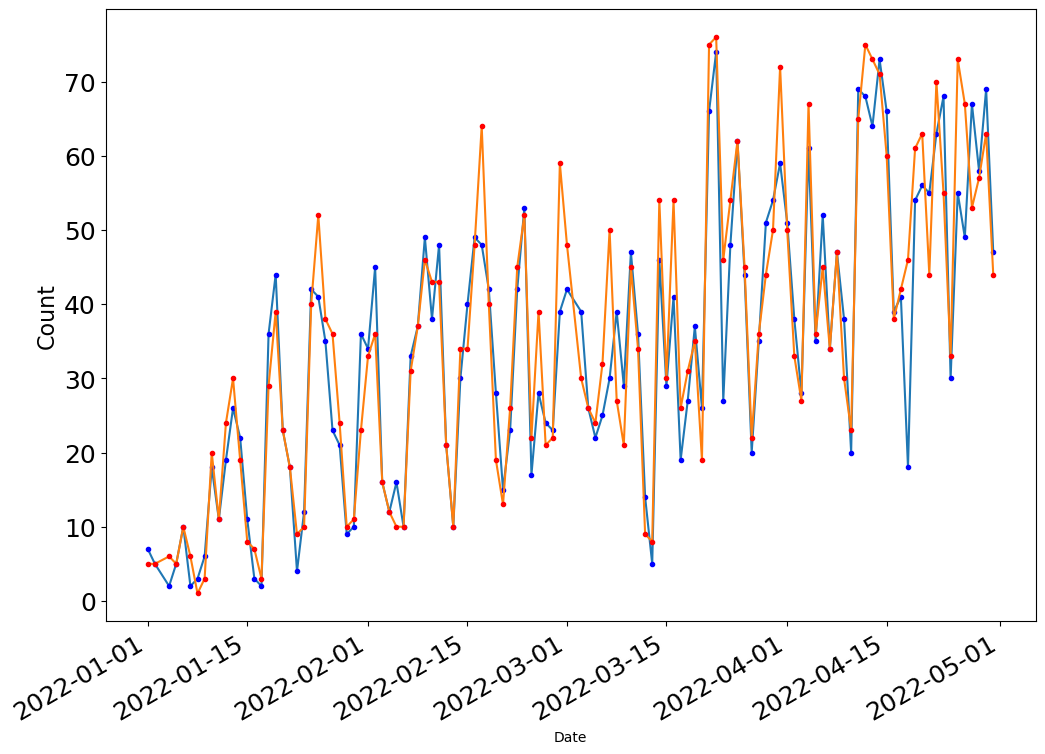

In [200]:
fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.plot_date( df_pu['started_at_date'], df_pu['pu_ct'],linestyle = 'solid',markeredgecolor = 'blue',markerfacecolor = 'blue', markersize = 3)
ax1.plot_date( df_do['ended_at_date'], df_do['do_ct'],linestyle = 'solid',markeredgecolor = 'red',markerfacecolor = 'red', markersize = 3)

ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('Count',fontsize=16)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=18)
plt.show()  

### In above graph pickup count is shown by blue line and drop-off is shown by red line. 

## Below are codes for "21st & I St NW" pick-up based on hours



In [201]:
# Group and get pickup occurrence for 21st & I St NW
df_sub1 = df[df['start_station_name']=="21st & I St NW"]
df_grp1 = df_sub1.groupby(['started_at_hour','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")
df_pu

,started_at_hour,start_station_name,pu_ct
0,0,21st & I St NW,25
1,1,21st & I St NW,15
2,2,21st & I St NW,17
3,3,21st & I St NW,2
4,4,21st & I St NW,13
5,5,21st & I St NW,3
6,6,21st & I St NW,4
7,7,21st & I St NW,21
8,8,21st & I St NW,35
9,9,21st & I St NW,84


### Count daily dropoffs

## Below are codes for "21st & I St NW" drop-off based on hours

In [202]:
# Group and get drop off occurrence for 21st & I St NW
df_sub2 = df[df['end_station_name']=="21st & I St NW"]
df_grp2 = df_sub2.groupby(['ended_at_hour','end_station_name']).size()
df_do=df_grp2.reset_index(name = "do_ct")
df_do

,ended_at_hour,end_station_name,do_ct
0,0,21st & I St NW,28
1,1,21st & I St NW,19
2,2,21st & I St NW,15
3,3,21st & I St NW,3
4,4,21st & I St NW,4
5,5,21st & I St NW,4
6,6,21st & I St NW,17
7,7,21st & I St NW,183
8,8,21st & I St NW,363
9,9,21st & I St NW,461


### Visualize pickups and dropoffs based on hours

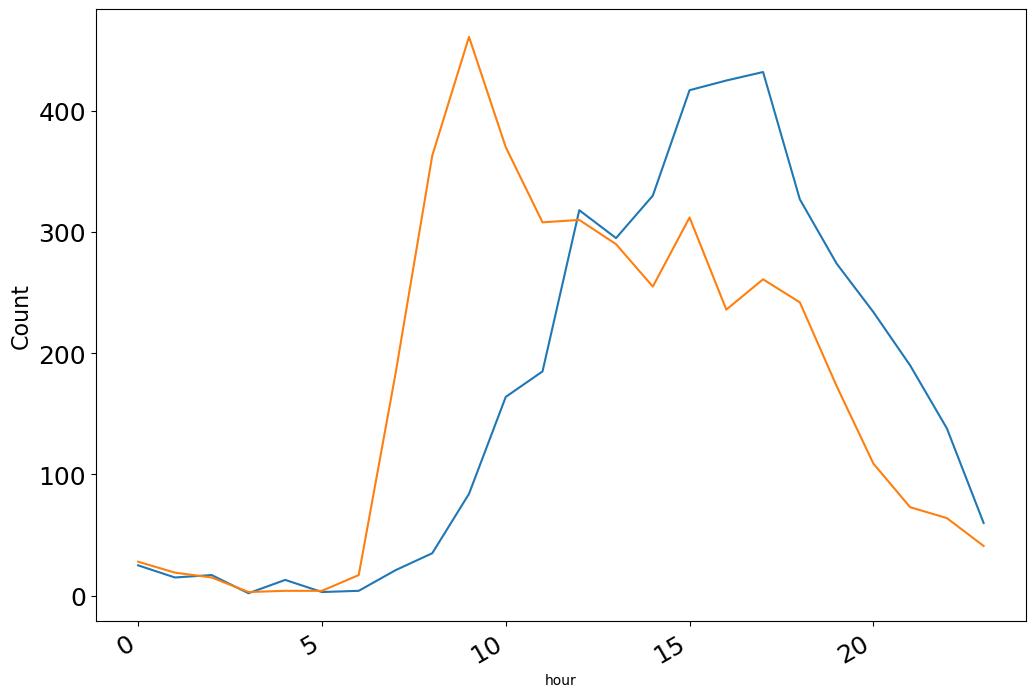

In [203]:
fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.plot( df_pu['started_at_hour'], df_pu['pu_ct'],linestyle = 'solid',markeredgecolor = 'blue',markerfacecolor = 'blue', markersize = 3)
ax1.plot( df_do['ended_at_hour'], df_do['do_ct'],linestyle = 'solid',markeredgecolor = 'red',markerfacecolor = 'red', markersize = 3)

ax1.set_xlabel('hour',fontsize=10)
ax1.set_ylabel('Count',fontsize=16)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=18)
plt.show()  

### In above graph , pick-up is shown by blue whereas drop-off is shown by red. X- axis represents the hours

## Below are codes for "21st & I St NW" pick-up based on date

In [204]:
# Group and get pickup occurrence for 21st & I St NW
df_sub1 = df[df['start_station_name']=="21st & I St NW"]
df_grp1 = df_sub1.groupby(['started_at_date','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")
df_pu

,started_at_date,start_station_name,pu_ct
0,2022-01-01,21st & I St NW,7
1,2022-01-02,21st & I St NW,5
2,2022-01-04,21st & I St NW,2
3,2022-01-05,21st & I St NW,5
4,2022-01-06,21st & I St NW,10
...,...,...,...
113,2022-04-26,21st & I St NW,49
114,2022-04-27,21st & I St NW,67
115,2022-04-28,21st & I St NW,58
116,2022-04-29,21st & I St NW,69


## Below are codes for "21st & I St NW" drop-off based on date

In [205]:
# Group and get drop off occurrence for 21st & I St NW
df_sub2 = df[df['end_station_name']=="21st & I St NW"]
df_grp2 = df_sub2.groupby(['ended_at_date','end_station_name']).size()
df_do=df_grp2.reset_index(name = "do_ct")
df_do

,ended_at_date,end_station_name,do_ct
0,2022-01-01,21st & I St NW,5
1,2022-01-02,21st & I St NW,5
2,2022-01-04,21st & I St NW,6
3,2022-01-05,21st & I St NW,5
4,2022-01-06,21st & I St NW,10
...,...,...,...
113,2022-04-26,21st & I St NW,67
114,2022-04-27,21st & I St NW,53
115,2022-04-28,21st & I St NW,57
116,2022-04-29,21st & I St NW,63


## Weather Data Introduction 

In [206]:
df_weather = pd.read_csv('DC Weather 2022-01-01 to 2022-12-31.csv')

df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Washington,DC,USA",2022-01-01,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,...,0.6,0,NaN,2022-01-01T07:26:53,2022-01-01T16:56:53,0.99,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,A..."
1,"Washington,DC,USA",2022-01-02,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,...,1.7,1,NaN,2022-01-02T07:27:00,2022-01-02T16:57:43,1.00,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
2,"Washington,DC,USA",2022-01-03,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,...,0.0,0,NaN,2022-01-03T07:27:05,2022-01-03T16:58:34,0.00,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,A..."
3,"Washington,DC,USA",2022-01-04,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,...,5.4,6,NaN,2022-01-04T07:27:07,2022-01-04T16:59:27,0.02,Clear,Clear conditions throughout the day.,snow,"KDCA,72405013743,72403793728,D6279,F0198,KADW,..."
4,"Washington,DC,USA",2022-01-05,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,...,2.2,1,NaN,2022-01-05T07:27:08,2022-01-05T17:00:21,0.05,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."


## Check missing values to analyze which all columns can be eliminated.



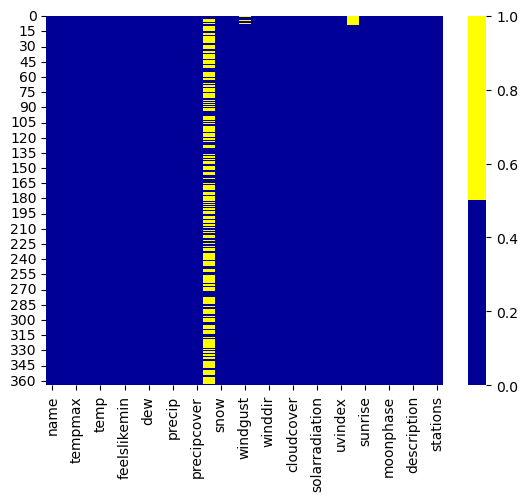

In [207]:
# Date time format 
df_weather['datetime'] = pd.to_datetime(df_weather['datetime']).dt.date

# Use sns heatmap to see whats are the null values.
coln = df_weather.columns[:df_weather.shape[1]]  
colors = ['#000099','#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(df_weather[coln].isnull(), cmap = sns.color_palette(colors))
plt.show()

## Drop variables from the above analysis

In [208]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

## Prepare X and y: Merge weather data with trip data of 21st & I St NW. Before of that remove started_at_date and end_at_date columns

In [209]:
# Remove the start and end date and then merge with weather data and 21st & I St NW . 

df_m_pu = df_pu.merge(df_weather, left_on='started_at_date', right_on='datetime') 
df_m_pu = df_m_pu.drop(columns=['started_at_date','start_station_name','datetime'])
df_m_do = df_do.merge(df_weather, left_on='ended_at_date', right_on='datetime') 
df_m_do = df_m_do.drop(columns=['ended_at_date','end_station_name','datetime'])

In [210]:
df_m_do.head()

,do_ct,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,5,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,...,11.4,190.2,1007.2,99.5,6.2,21.4,0.6,0,0.99,rain
1,5,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,...,18.9,290.7,1006.6,91.6,9.6,47.3,1.7,1,1.00,rain
2,6,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,...,14.1,192.1,1029.7,18.7,9.9,153.2,5.4,6,0.02,snow
3,5,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,...,13.6,195.2,1014.5,82.6,9.9,63.5,2.2,1,0.05,partly-cloudy-day
4,10,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,...,12.9,16.0,1012.7,88.1,9.9,145.6,5.3,4,0.09,snow


#  Train linear models for "21st & I St NW"

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [212]:
# pickup
y = df_m_pu['pu_ct']
X = df_m_pu.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0
4,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,88.1,9.9,145.6,5.3,4,0.09,0,0,1,0


In [213]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

## Linear Regression for 21st & I St NW Pick-up

In [214]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train) 
y_pred = linear_regressor.predict(X_test)

In [215]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns))

tempmax                   0.431837
tempmin                   0.448190
temp                     -1.871509
feelslikemax             -0.538638
feelslikemin             -0.896445
feelslike                 1.318472
dew                       2.196419
humidity                 -1.363480
precip                    4.108471
precipprob                0.015612
precipcover              -0.207099
snow                     -2.908279
snowdepth                 0.065122
windspeed                -1.213763
winddir                   0.032159
sealevelpressure          0.162454
cloudcover                0.101044
visibility               -0.653260
solarradiation           -0.249588
solarenergy               3.458863
uvindex                  -0.331106
moonphase                 4.358135
icon_partly-cloudy-day   -1.570322
icon_rain                -3.090264
icon_snow                 4.660585
icon_wind                 0.000000
dtype: float64


In [216]:
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 213.572


##  Linear Regression of  21st & I St NW  drop off

In [217]:
y1 = df_m_do['do_ct']
X1 = df_m_do.drop('do_ct',axis=1)
X1= pd.get_dummies(data=X1, drop_first=True)
X1.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0
4,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,88.1,9.9,145.6,5.3,4,0.09,0,0,1,0


In [218]:
X_train1,X_test1, y_train1,y_test1 = train_test_split(X1,y1, test_size=0.4, random_state = 200)

In [219]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train1, y_train1) 
y_pred = linear_regressor.predict(X_test1)

In [220]:
mse = round(mean_squared_error(y_test1, y_pred),3)
print(f"MSE is {mse}")

MSE is 233.961


## LASSO 21st & I St NW Pick up

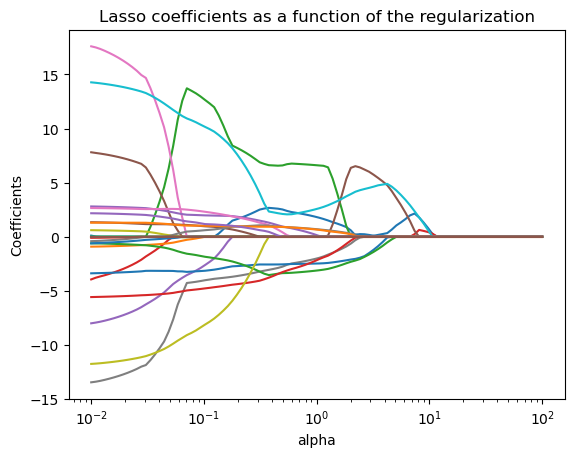

In [221]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [222]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.7924828983539177


## Calculating the MSE with attained best alpha for 21st & I St NW Pick UP

In [223]:
# With the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   2.061753
tempmin                   0.000000
temp                      6.690140
feelslikemax              0.000000
feelslikemin              0.000000
feelslike                 0.000000
dew                       0.000000
humidity                 -2.245071
precip                   -0.000000
precipprob               -0.000000
precipcover              -2.495638
snow                      0.000000
snowdepth                -3.228062
windspeed                -2.590788
winddir                   0.481611
sealevelpressure          0.000000
cloudcover                0.000000
visibility                0.790024
solarradiation           -0.000000
solarenergy               2.318058
uvindex                   0.000000
moonphase                 0.765663
icon_partly-cloudy-day    0.000000
icon_rain                -0.000000
icon_snow                 0.000000
icon_wind                 0.000000
dtype: float64


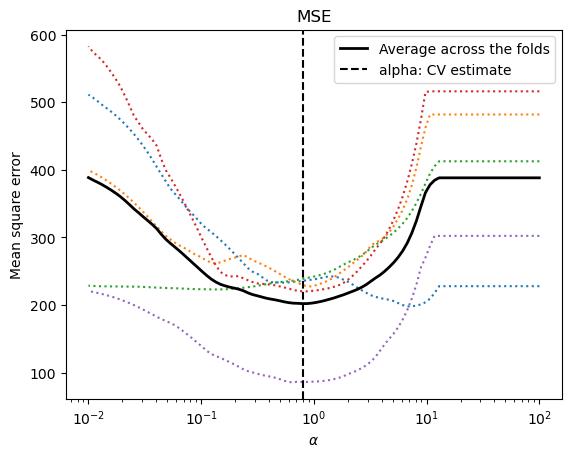

In [224]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [225]:
y_pred=lasso.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 143.928


In [226]:
# trying

In [227]:
# Define a new observation as a dictionary
new_observation = {
    'tempmax': 70, # maxitemperature in degrees Fahrenheit
    'tempmin': 50, # mini temperature in degrees Fahrenheit
    'temp': 60, # temperature in degrees Fahrenheit
    'feelslikemax': 80, # maximum "feels like" temperature in degrees Fahrenheit
    'feelslikemin': 50, # minimum "feels like" temperature in degrees Fahrenheit
    'feelslike': 70, # "feels like" temperature in degrees Fahrenheit
    'dew': 60, # dew point temperature in degrees Fahrenheit
    'humidity': 0, # humidity as a percentage
    'precip': 0.5, # precipitation in inches
    'precipprob': 30, # probability of precipitation as a %
    'precipcover': 10, # precipitation cover as a %
    'snow': 10, # snowfall in inches
    'snowdepth': 0, # snow depth in inches
    'windspeed': 10, # wind speed in mph
    'winddir': 180, # wind direction in degrees (0-360)
    'sealevelpressure': 1010, # sea level pressure in mb
    'cloudcover': 50, # cloud cover as a percentage
    'visibility': 0, # visibility in miles
    'solarradiation': 500, # solar radiation in watt-hours per square meter
    'solarenergy': 200, # solar energy in watt-hours per square meter
    'uvindex': 5, # UV index
    'moonphase': 0.75, # moon phase as a fraction (0-1)
    'icon_partly-cloudy-day': 1, # whether the icon represents "partly cloudy" during the day (1 for yes, 0 for no)
    'icon_rain': 0, # whether the icon represents rain (1 for yes, 0 for no)
    'icon_snow': 0, # whether the icon represents snow (1 for yes, 0 for no)
    'icon_wind': 0 # whether the icon represents wind (1 for yes, 0 for no)
}

# Convert the dictionary to a DataFrame
new_observation_df = pd.DataFrame(new_observation, index=[0])



# Predict the number of pickups using the Lasso regression model
lasso_pickups_pred = lassocv.predict(new_observation_df)

print("Predicted number of 21st & I St NW Pick -UP  for the new observation: ", lasso_pickups_pred[0])

Predicted number of 21st & I St NW Pick -UP  for the new observation:  1078.6140250986173


C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


##   Lasso of  21st & I St NW drop off check

In [228]:
# drop off
y_do = df_m_do['do_ct']
X_do = df_m_do.drop('do_ct',axis=1)
X_do = pd.get_dummies(data=X_do, drop_first=True)
X_do.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0
4,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,88.1,9.9,145.6,5.3,4,0.09,0,0,1,0


In [229]:
X_train_do,X_test_do, y_train_do,y_test_do = train_test_split(X_do,y_do, test_size=0.4, random_state = 200)

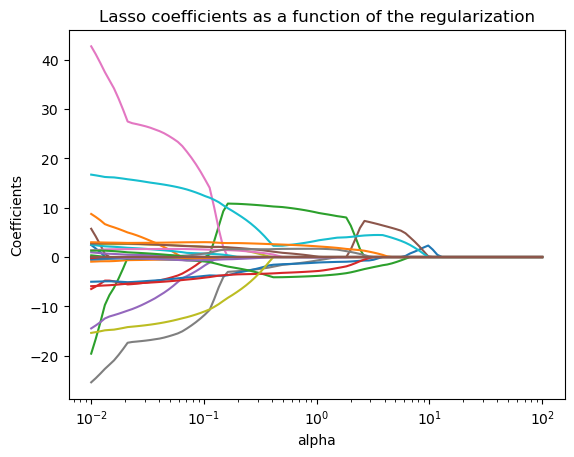

In [230]:
## LASSO Drop off
alphas_do = 10**np.linspace(-2,2,100)

lasso_do = Lasso()
coefs_do = []

for a in alphas_do:
    lasso_do.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso_do.fit(scale(X_train_do), y_train_do)
    coefs_do.append(lasso_do.coef_)

ax = plt.gca()
ax.plot(alphas_do, coefs_do)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train_.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [231]:
# find the best alpha via CV with selected scoring metric
lassocv_do = LassoCV(alphas=alphas_do, max_iter=10000)
lassocv_do.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv_do.alpha_)

The best alpha from LassoCV: 0.7924828983539177


In [232]:
# with the best alpha
lasso_do.set_params(alpha=lassocv_do.alpha_)
lasso_do.fit(scale(X_train_do), y_train_do)
print('The coefficients are:')
print(pd.Series(lasso_do.coef_.flatten(), index=X_train_do.columns))

The coefficients are:
tempmax                   0.000000
tempmin                   0.000000
temp                      9.476222
feelslikemax              0.000000
feelslikemin              0.000000
feelslike                 0.000000
dew                       0.000000
humidity                 -1.076821
precip                    0.000000
precipprob               -0.000000
precipcover              -1.267783
snow                     -0.000000
snowdepth                -3.939153
windspeed                -3.001105
winddir                  -0.000000
sealevelpressure          0.413430
cloudcover                0.000000
visibility                1.664881
solarradiation           -0.000000
solarenergy               2.883530
uvindex                   0.000000
moonphase                 2.315810
icon_partly-cloudy-day    0.000000
icon_rain                -0.000000
icon_snow                -0.060243
icon_wind                 0.000000
dtype: float64


In [233]:
y_pred_do=lasso_do.predict(scale(X_test_do.values))
mse_do = round(mean_squared_error(y_test_do, y_pred_do),3)
print(f"MSE is {mse_do}")

MSE is 131.77


In [234]:
#lassocv_do = LassoCV(alphas=alphas)
#lassocv.fit(scale(X_train_do), y_train_do)

#print('The best alpha from LassoCV:', lassocv.alpha_)

In [235]:
# Make predictions for a new observation
new_observation = pd.DataFrame({
    'tempmax': 10, # max temperature in degrees Fahrenheit
    'tempmin': 0, # min temperature in degrees Fahrenheit
    'temp': 0, # temperature in degrees Fahrenheit
    'feelslikemax': 80, # maximum "feels like" temperature in degrees Fahrenheit
    'feelslikemin': 50, # minimum "feels like" temperature in degrees Fahrenheit
    'feelslike': 70, # "feels like" temperature in degrees Fahrenheit
    'dew': 0, # dew point temperature in degrees Fahrenheit
    'humidity': 50, # humidity as a percentage
    'precip': 0.5, # precipitation in inches
    'precipprob': 30, # probability of precipitation as a % 
    'precipcover': 10, # precipitation cover as a %
    'snow': 0, # snowfall in inches
    'snowdepth': 0, # snow depth in inches
    'windspeed': 10, # wind speed in mph
    'winddir': 180, # wind direction in degrees (0-360)
    'sealevelpressure': 1010, # sea level pressure in mb
    'cloudcover': 50, # cloud cover as a percentage
    'visibility': 0, # visibility in miles
    'solarradiation': 500, # solar radiation in watt-hours per square meter
    'solarenergy': 200, # solar energy in watt-hours per square meter
    'uvindex': 5, # UV index
    'moonphase': 0.75, # moon phase as a fraction (0-1)
    'icon_partly-cloudy-day': 1,
    'icon_rain' : 1,
    'icon_snow' : 1,
    'icon_wind' : 1
}, index=[0])
# Convert the dictionary to a DataFrame
new_observation_df = pd.DataFrame(new_observation, index=[0])

# Predict the number of pickups using the Lasso regression model
lasso_dropoffs_pred = lassocv.predict(new_observation)

print("Predicted number of 21st & I St NW dropoffs  for the new observation: ", lasso_dropoffs_pred[0])


Predicted number of 21st & I St NW dropoffs  for the new observation:  441.2469070227142


C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


## KNN method for 21st & I St NW Pick -UP

In [236]:
# pickup
y = df_m_pu['pu_ct']
X = df_m_pu.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0
4,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,88.1,9.9,145.6,5.3,4,0.09,0,0,1,0


In [237]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

In [238]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
mse_train = [-1]*30
mse_test = [-1]*30
for K in range(30):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train, y_train)  #fit the model
    mse_train[K] = mean_squared_error(y_train, model.predict(X_train))
    mse_test[K] = mean_squared_error(y_test, model.predict(X_test))

In [239]:
# optimal k
np.argmin(mse_test)+1

8

In [240]:
# optimal MSE
min(mse_test)

226.99739583333334

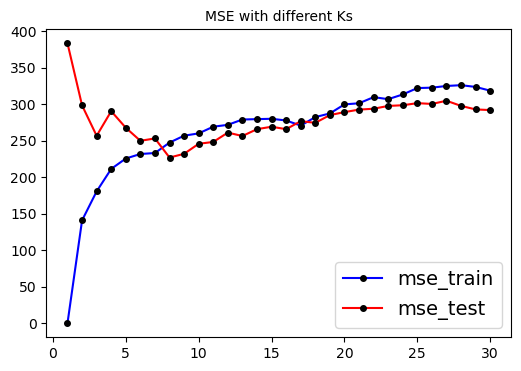

In [241]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(30)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(30)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=14)
plt.title('MSE with different Ks', fontsize=10)
plt.tick_params(labelsize=10)
plt.show()

## KNN method for 21st & I St NW Drop-off

In [242]:
# drop off
y_do = df_m_do['do_ct']
X_do = df_m_do.drop('do_ct',axis=1)
X_do = pd.get_dummies(data=X_do, drop_first=True)
X_do.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0
4,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,88.1,9.9,145.6,5.3,4,0.09,0,0,1,0


In [243]:
X_train_do,X_test_do, y_train_do,y_test_do = train_test_split(X_do,y_do, test_size=0.4, random_state = 200)

In [244]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
mse_train_do= [-1]*30
mse_test_do = [-1]*30
for K in range(30):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train_do, y_train_do)  #fit the model
    mse_train_do[K] = mean_squared_error(y_train_do, model.predict(X_train_do))
    mse_test_do[K] = mean_squared_error(y_test_do, model.predict(X_test_do))

In [245]:
# optimal k
np.argmin(mse_test_do)+1

3

In [246]:
# optimal MSE
min(mse_test_do)

210.54398148148144

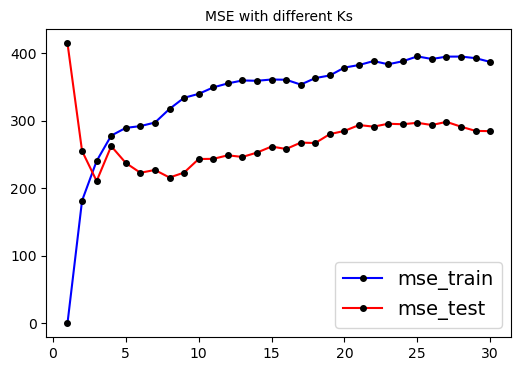

In [247]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(30)+1, mse_train_do,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(30)+1, mse_test_do,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=14)
plt.title('MSE with different Ks', fontsize=10)
plt.tick_params(labelsize=10)
plt.show()

##  Ridge method for 21st & I St NW Pick-UP

In [248]:
# pickup
y = df_m_pu['pu_ct']
X = df_m_pu.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0
4,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,88.1,9.9,145.6,5.3,4,0.09,0,0,1,0


In [249]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

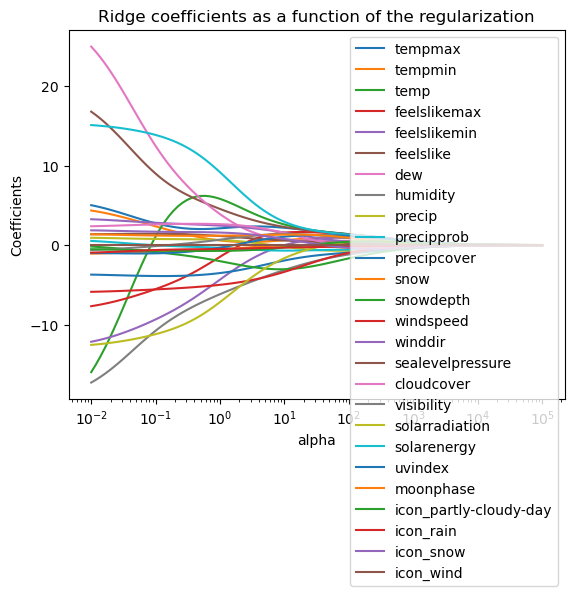

In [250]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [251]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [252]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.518914
tempmin                   0.417278
temp                      0.501468
feelslikemax              0.516175
feelslikemin              0.434726
feelslike                 0.505465
dew                       0.256249
humidity                 -0.323599
precip                   -0.318611
precipprob               -0.249697
precipcover              -0.360155
snow                     -0.279665
snowdepth                -0.403603
windspeed                -0.159882
winddir                   0.080501
sealevelpressure          0.042812
cloudcover               -0.162258
visibility                0.296259
solarradiation            0.353997
solarenergy               0.496237
uvindex                   0.468611
moonphase                 0.205383
icon_partly-cloudy-day    0.286303
icon_rain                -0.068904
icon_snow                -0.305114
icon_wind                 0.000000
dtype: float64


In [253]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 65.79332246575676


In [254]:
y_pred=ridgecv.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 147.98


## Ridge method for 21st & I St NW Drop-off

In [255]:
# drop off
y_do = df_m_do['do_ct']
X_do = df_m_do.drop('do_ct',axis=1)
X_do = pd.get_dummies(data=X_do, drop_first=True)
X_do.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0
4,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,88.1,9.9,145.6,5.3,4,0.09,0,0,1,0


In [256]:
X_train_do,X_test_do, y_train_do,y_test_do = train_test_split(X_do,y_do, test_size=0.4, random_state = 200)

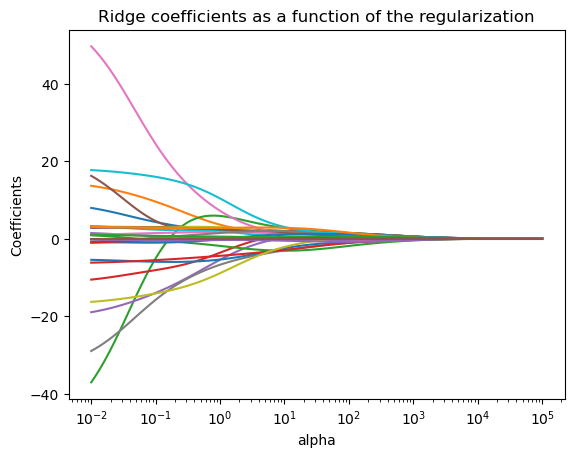

In [257]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train_do), y_train_do)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')

plt.title('Ridge coefficients as a function of the regularization');

In [258]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train_do)

In [259]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train_do), y_train_do)

Ridge(alpha=1000)

In [260]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train_do), y_train_do)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 65.79332246575676


In [261]:
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train_do), y_train_do)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train_do.columns))

The coefficients are:
tempmax                   1.523963
tempmin                   1.239480
temp                      1.612245
feelslikemax              1.343719
feelslikemin              1.141592
feelslike                 1.527834
dew                       0.768023
humidity                 -1.343253
precip                   -0.174455
precipprob               -0.275417
precipcover              -1.028967
snow                     -0.564660
snowdepth                -2.225236
windspeed                -1.389369
winddir                  -0.427958
sealevelpressure          0.705765
cloudcover               -0.001681
visibility                1.125455
solarradiation            0.065044
solarenergy               1.417056
uvindex                   1.168872
moonphase                 1.882597
icon_partly-cloudy-day    0.516309
icon_rain                 0.076098
icon_snow                -0.795052
icon_wind                 0.000000
dtype: float64


In [262]:
# Calculate and print the final MSE value
y_pred_do = ridge.predict(scale(X_test_do.values))
mse = mean_squared_error(y_test_do, y_pred_do)
print(f"MSE for Ridge is {mse}")

MSE for Ridge is 128.5973945629453


## Elastic Regression for  21st & I St NW  Pick Up

In [263]:
## Elastic Net
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.8441537223475757


In [264]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)


EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   1.787805
tempmin                   0.732949
temp                      1.822107
feelslikemax              1.605643
feelslikemin              0.684583
feelslike                 1.779751
dew                       0.070541
humidity                 -1.589035
precip                   -0.578261
precipprob               -0.506038
precipcover              -1.276274
snow                     -0.000000
snowdepth                -2.460448
windspeed                -1.725519
winddir                   0.483840
sealevelpressure          0.000000
cloudcover                0.000000
visibility                1.080337
solarradiation            0.000000
solarenergy               1.708672
uvindex                   1.202641
moonphase                 1.064203
icon_partly-cloudy-day    0.085965
icon_rain                -0.000000
icon_snow                -0.000000
icon_wind                 0.000000
dtype: float64


In [265]:
y_pred=ENcv.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 144.573


## Elastic Regression for  21st & I St NW  Drop-Off

In [266]:
# drop off
y_do = df_m_do['do_ct']
X_do = df_m_do.drop('do_ct',axis=1)
X_do = pd.get_dummies(data=X_do, drop_first=True)
X_do.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0
4,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,88.1,9.9,145.6,5.3,4,0.09,0,0,1,0


In [267]:
X_train_do,X_test_do, y_train_do,y_test_do = train_test_split(X_do,y_do, test_size=0.4, random_state = 200)

In [268]:
## Elastic Net
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv_do= ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train_do), y_train_do)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.8000497261907156


In [269]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train_do), y_train_do)


EN_do=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train_do), y_train_do)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   1.709979
tempmin                   1.225950
temp                      1.971675
feelslikemax              1.301766
feelslikemin              0.974971
feelslike                 1.783743
dew                       0.482155
humidity                 -1.476576
precip                   -0.000000
precipprob               -0.000000
precipcover              -1.203158
snow                     -0.259797
snowdepth                -2.780053
windspeed                -1.917766
winddir                  -0.223894
sealevelpressure          0.662049
cloudcover                0.000000
visibility                1.333035
solarradiation           -0.000000
solarenergy               1.625183
uvindex                   1.040007
moonphase                 2.185131
icon_partly-cloudy-day    0.281284
icon_rain                -0.000000
icon_snow                -0.697454
icon_wind                 0.000000
dtype: float64


In [270]:
y_pred_do=ENcv.predict(scale(X_test_do.values))
mse = round(mean_squared_error(y_test_do, y_pred_do),3)
print(f"MSE is {mse}")

MSE is 129.268


## Model  Prediction using LASSO

## 21st & I St NW Pick Up 

In [271]:
X_test.iloc[[22]]

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
84,40.8,29.7,34.0,31.8,18.2,24.5,10.3,37.6,0.001,100,...,66.7,9.9,122.6,10.5,6,0.92,0,1,0,0


In [272]:
y_pred = lasso.predict(scaler.transform(X_test.iloc[[22]]))
print(y_pred)

[29.8228218]


In [273]:
y_test.iloc[[22]]

84    35
Name: pu_ct, dtype: int64

## 21st & I St NW Drop -Up

In [274]:
X_test_do.iloc[[22]]

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
84,40.8,29.7,34.0,31.8,18.2,24.5,10.3,37.6,0.001,100,...,66.7,9.9,122.6,10.5,6,0.92,0,1,0,0


In [275]:
scaler.transform(X_test_do.iloc[[22]])

array([[-1.11722593, -0.74957612, -1.02860659, -1.46014195, -0.96973035,
        -1.23044905, -1.52806155, -1.37392408, -0.45654371,  1.34164079,
        -0.3396179 , -0.33973241, -0.33383682,  1.4611436 ,  0.9727503 ,
        -0.23722089, -0.06732483,  0.56227185,  0.54251718,  0.61325049,
         0.42049714,  1.2327732 , -1.15470054,  1.63835604, -0.43178777,
         0.        ]])

In [276]:
y_pred_do= lasso.predict(scaler.transform(X_test_do.iloc[[22]]))
print(y_pred_do)

[29.8228218]


In [277]:
y_test_do.iloc[[22]]

84    36
Name: do_ct, dtype: int64

## ## Another way Date

In [278]:
df_pu.iloc[22]# pickup

started_at_date           2022-01-24
start_station_name    21st & I St NW
pu_ct                             42
Name: 22, dtype: object

In [279]:
X_test.iloc[[22]]

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
84,40.8,29.7,34.0,31.8,18.2,24.5,10.3,37.6,0.001,100,...,66.7,9.9,122.6,10.5,6,0.92,0,1,0,0


In [280]:
df_do.iloc[22]# drop up 

ended_at_date           2022-01-24
end_station_name    21st & I St NW
do_ct                           40
Name: 22, dtype: object

In [281]:
X_test_do.iloc[[22]]

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
84,40.8,29.7,34.0,31.8,18.2,24.5,10.3,37.6,0.001,100,...,66.7,9.9,122.6,10.5,6,0.92,0,1,0,0


In [282]:
## other date 

In [289]:
df_pu.iloc[102]# pickup

started_at_date           2022-04-15
start_station_name    21st & I St NW
pu_ct                             66
Name: 102, dtype: object

In [290]:
df_do.iloc[102]# drop up 

ended_at_date           2022-04-15
end_station_name    21st & I St NW
do_ct                           60
Name: 102, dtype: object

### Below are codes for "21st St & Pennsylvania Ave NW" based on hours : code for pick-up

In [293]:
# Group and get pickup occurrence for 21st St & Pennsylvania Ave NW
df_sub1 = df[df['start_station_name']=="21st St & Pennsylvania Ave NW"]
df_grp1 = df_sub1.groupby(['started_at_hour','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")
df_pu

,started_at_hour,start_station_name,pu_ct
0,0,21st St & Pennsylvania Ave NW,6
1,1,21st St & Pennsylvania Ave NW,9
2,2,21st St & Pennsylvania Ave NW,3
3,4,21st St & Pennsylvania Ave NW,3
4,5,21st St & Pennsylvania Ave NW,1
5,7,21st St & Pennsylvania Ave NW,11
6,8,21st St & Pennsylvania Ave NW,69
7,9,21st St & Pennsylvania Ave NW,53
8,10,21st St & Pennsylvania Ave NW,56
9,11,21st St & Pennsylvania Ave NW,67


## 2nd station "21st St & Pennsylvania Ave NW" based on hours : code for drop-off

In [294]:
# Group and get drop off occurrence for 21st St & Pennsylvania Ave NW
df_sub2 = df[df['end_station_name']=="21st St & Pennsylvania Ave NW"]
df_grp2 = df_sub2.groupby(['ended_at_hour','end_station_name']).size()
df_do=df_grp2.reset_index(name = "do_ct")
df_do

,ended_at_hour,end_station_name,do_ct
0,0,21st St & Pennsylvania Ave NW,7
1,1,21st St & Pennsylvania Ave NW,5
2,2,21st St & Pennsylvania Ave NW,2
3,5,21st St & Pennsylvania Ave NW,1
4,6,21st St & Pennsylvania Ave NW,24
5,7,21st St & Pennsylvania Ave NW,110
6,8,21st St & Pennsylvania Ave NW,263
7,9,21st St & Pennsylvania Ave NW,269
8,10,21st St & Pennsylvania Ave NW,181
9,11,21st St & Pennsylvania Ave NW,134


### Below are codes for "21st St & Pennsylvania Ave NW" based on date : code for pick-off

In [295]:
# Group and get pickup occurrence for 21st St & Pennsylvania Ave NW
df_sub1 = df[df['start_station_name']=="21st St & Pennsylvania Ave NW"]
df_grp1 = df_sub1.groupby(['started_at_date','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")
df_pu

,started_at_date,start_station_name,pu_ct
0,2022-01-01,21st St & Pennsylvania Ave NW,5
1,2022-01-02,21st St & Pennsylvania Ave NW,1
2,2022-01-03,21st St & Pennsylvania Ave NW,1
3,2022-01-05,21st St & Pennsylvania Ave NW,3
4,2022-01-06,21st St & Pennsylvania Ave NW,5
...,...,...,...
110,2022-04-26,21st St & Pennsylvania Ave NW,22
111,2022-04-27,21st St & Pennsylvania Ave NW,21
112,2022-04-28,21st St & Pennsylvania Ave NW,23
113,2022-04-29,21st St & Pennsylvania Ave NW,23


### Below are codes for "21st St & Pennsylvania Ave NW" based on date : code for drop-off

In [296]:
# Group and get drop off occurrence for 21st St & Pennsylvania Ave NW
df_sub2 = df[df['end_station_name']=="21st St & Pennsylvania Ave NW"]
df_grp2 = df_sub2.groupby(['ended_at_date','end_station_name']).size()
df_do=df_grp2.reset_index(name = "do_ct")
df_do

,ended_at_date,end_station_name,do_ct
0,2022-01-01,21st St & Pennsylvania Ave NW,4
1,2022-01-02,21st St & Pennsylvania Ave NW,3
2,2022-01-03,21st St & Pennsylvania Ave NW,2
3,2022-01-04,21st St & Pennsylvania Ave NW,1
4,2022-01-05,21st St & Pennsylvania Ave NW,4
...,...,...,...
114,2022-04-26,21st St & Pennsylvania Ave NW,29
115,2022-04-27,21st St & Pennsylvania Ave NW,29
116,2022-04-28,21st St & Pennsylvania Ave NW,26
117,2022-04-29,21st St & Pennsylvania Ave NW,34


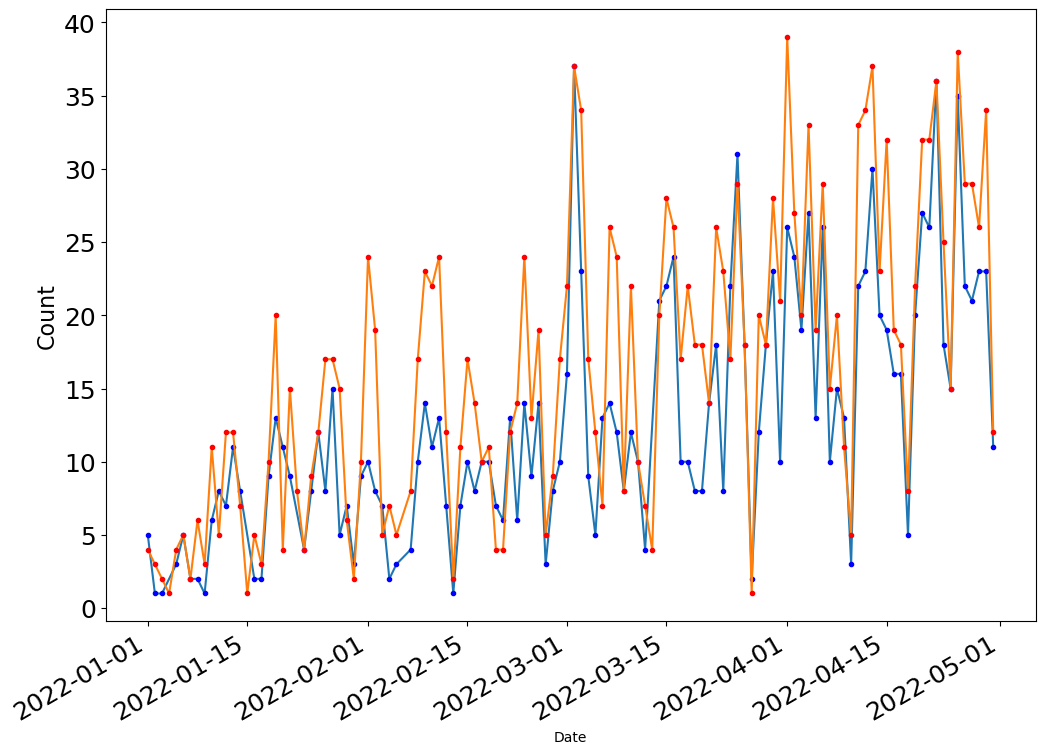

In [297]:
fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.plot_date( df_pu['started_at_date'], df_pu['pu_ct'],linestyle = 'solid',markeredgecolor = 'blue',markerfacecolor = 'blue', markersize = 3)
ax1.plot_date( df_do['ended_at_date'], df_do['do_ct'],linestyle = 'solid',markeredgecolor = 'red',markerfacecolor = 'red', markersize = 3)

ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('Count',fontsize=16)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=18)
plt.show()

### In above graph pickup count is shown by blue line and drop-off is shown by red line. it is for 21st St & Pennsylvania Ave NW

### Weather Data Again 

In [298]:
df_weather = pd.read_csv('DC Weather 2022-01-01 to 2022-12-31.csv')

df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Washington,DC,USA",2022-01-01,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,...,0.6,0,NaN,2022-01-01T07:26:53,2022-01-01T16:56:53,0.99,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,A..."
1,"Washington,DC,USA",2022-01-02,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,...,1.7,1,NaN,2022-01-02T07:27:00,2022-01-02T16:57:43,1.00,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
2,"Washington,DC,USA",2022-01-03,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,...,0.0,0,NaN,2022-01-03T07:27:05,2022-01-03T16:58:34,0.00,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,A..."
3,"Washington,DC,USA",2022-01-04,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,...,5.4,6,NaN,2022-01-04T07:27:07,2022-01-04T16:59:27,0.02,Clear,Clear conditions throughout the day.,snow,"KDCA,72405013743,72403793728,D6279,F0198,KADW,..."
4,"Washington,DC,USA",2022-01-05,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,...,2.2,1,NaN,2022-01-05T07:27:08,2022-01-05T17:00:21,0.05,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."


## Check missing values to analysis which all columns can be eliminated 

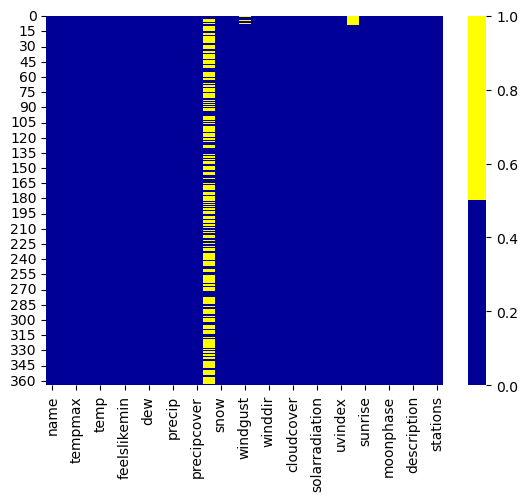

In [299]:
# Date time format 
df_weather['datetime'] = pd.to_datetime(df_weather['datetime']).dt.date

# Use sns heatmap to see whats are the null values.
coln = df_weather.columns[:df_weather.shape[1]]  
colors = ['#000099','#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(df_weather[coln].isnull(), cmap = sns.color_palette(colors))
plt.show()

## Drop the columns which are unnecessary

In [300]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

## Prepare X and y: Merge weather data with trip data of 21st & I St NW. Before of that remove started_at_date and end_at_date columns

In [301]:
# Merge with weather data and remove dates and station name

df_m_pu = df_pu.merge(df_weather, left_on='started_at_date', right_on='datetime') 
df_m_pu = df_m_pu.drop(columns=['started_at_date','start_station_name','datetime'])
df_m_do = df_do.merge(df_weather, left_on='ended_at_date', right_on='datetime') 
df_m_do = df_m_do.drop(columns=['ended_at_date','end_station_name','datetime'])

In [302]:
df_m_pu.head()


,pu_ct,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,5,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,...,11.4,190.2,1007.2,99.5,6.2,21.4,0.6,0,0.99,rain
1,1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,...,18.9,290.7,1006.6,91.6,9.6,47.3,1.7,1,1.00,rain
2,1,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,0.889,...,22.5,358.5,1019.7,77.2,6.2,6.3,0.0,0,0.00,snow
3,3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,...,13.6,195.2,1014.5,82.6,9.9,63.5,2.2,1,0.05,partly-cloudy-day
4,5,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,...,12.9,16.0,1012.7,88.1,9.9,145.6,5.3,4,0.09,snow


## Train data for linear regression : 21st St & Pennsylvania Ave NW 

In [303]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [304]:
# pickup
y = df_m_pu['pu_ct']
X = df_m_pu.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,0.889,100,...,77.2,6.2,6.3,0.0,0,0.00,0,0,1,0
3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0
4,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,88.1,9.9,145.6,5.3,4,0.09,0,0,1,0


In [305]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

## Linear regression for 21st St & Pennsylvania Ave NW Pick Up 

In [306]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train) 
y_pred = linear_regressor.predict(X_test)

In [307]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns))

tempmax                   0.945492
tempmin                   0.445349
temp                     -2.031484
feelslikemax             -0.771055
feelslikemin             -0.679134
feelslike                 0.764571
dew                       1.862416
humidity                 -0.916568
precip                   -2.382399
precipprob               -0.004082
precipcover              -0.075051
snow                     -0.114305
snowdepth                 0.746721
windspeed                -0.676991
winddir                   0.014838
sealevelpressure         -0.195860
cloudcover                0.033615
visibility               -2.954038
solarradiation           -0.074035
solarenergy               1.292846
uvindex                   0.718006
moonphase                 1.677679
icon_partly-cloudy-day    4.111127
icon_rain                 3.979878
icon_snow                 2.609011
icon_wind                 0.000000
dtype: float64


In [308]:
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 47.308


## Linear regression  21st St & Pennsylvania Ave NW DROP OFF

In [309]:
# drop off
y1 = df_m_do['do_ct']
X1 = df_m_do.drop('do_ct',axis=1)
X1= pd.get_dummies(data=X1, drop_first=True)
X1.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,0.889,100,...,77.2,6.2,6.3,0.0,0,0.00,0,0,1,0
3,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
4,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0


In [310]:
X_train1,X_test1, y_train1,y_test1 = train_test_split(X1,y1, test_size=0.4, random_state = 200)

In [311]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train1, y_train1) 
y_pred = linear_regressor.predict(X_test1)

In [312]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns))

tempmax                    0.961719
tempmin                    1.469004
temp                      -5.040983
feelslikemax              -0.695351
feelslikemin              -0.791879
feelslike                  2.046496
dew                        2.516393
humidity                  -1.142848
precip                    15.216122
precipprob                 0.106878
precipcover               -0.173749
snow                      -1.289838
snowdepth                  1.328512
windspeed                 -0.547111
winddir                    0.012148
sealevelpressure           0.118925
cloudcover                -0.016294
visibility                 0.228567
solarradiation            -0.140639
solarenergy                2.551903
uvindex                    0.262377
moonphase                  0.094145
icon_partly-cloudy-day    -1.357301
icon_rain                 -8.124269
icon_snow                 -4.239596
icon_wind                 13.721166
dtype: float64


In [313]:
mse = round(mean_squared_error(y_test1, y_pred),3)
print(f"MSE is {mse}")

MSE is 55.297


## Above is the MSE obtained from the linear regression

## LASSO  21st St & Pennsylvania Ave NW PIckUP

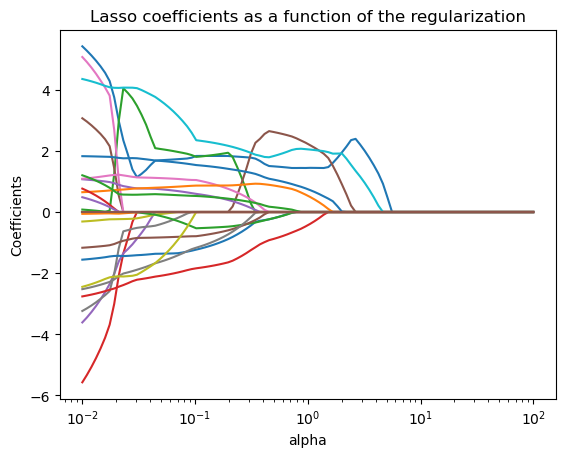

In [314]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

## Obatining best alpha from LASSO modeling

In [315]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.7924828983539177


In [316]:
# With the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   1.439375
tempmin                   0.000000
temp                      0.000000
feelslikemax              0.000000
feelslikemin              0.000000
feelslike                 2.410625
dew                       0.000000
humidity                 -0.000000
precip                   -0.000000
precipprob               -0.000000
precipcover              -0.000000
snow                     -0.000000
snowdepth                -0.000000
windspeed                -0.611661
winddir                   0.000000
sealevelpressure         -0.000000
cloudcover                0.000000
visibility               -0.000000
solarradiation            0.000000
solarenergy               2.061292
uvindex                   0.869532
moonphase                 0.704540
icon_partly-cloudy-day    0.037787
icon_rain                -0.000000
icon_snow                -0.000000
icon_wind                 0.000000
dtype: float64


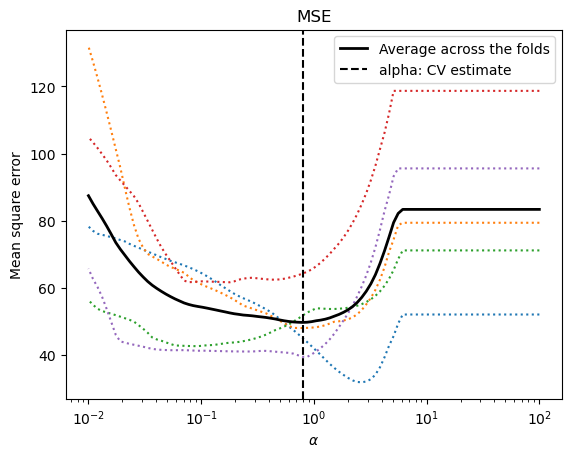

In [317]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [318]:
y_pred=lasso.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 26.123


In [319]:
lassocv = LassoCV(alphas=alphas)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.478586265953709, tolerance: 0.49325454545454545
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5844235933127493, tolerance: 0.4562109090909091
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7554989587401906, tolerance: 0.4562109090909091
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklea

The best alpha from LassoCV: 0.7924828983539177


C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.283697960882137, tolerance: 0.44349821428571434
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.601108412383383, tolerance: 0.44349821428571434
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.53893864168185, tolerance: 0.44349821428571434
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\imdim\Documents\anaconda3\lib\site-packages\skle

## LASSO 21st St & Pennsylvania Ave NW Dropp up

In [320]:
# drop off
y_do = df_m_do['do_ct']
X_do = df_m_do.drop('do_ct',axis=1)
X_do = pd.get_dummies(data=X_do, drop_first=True)
X_do.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,0.889,100,...,77.2,6.2,6.3,0.0,0,0.00,0,0,1,0
3,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
4,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0


In [321]:
X_train_do,X_test_do, y_train_do,y_test_do = train_test_split(X_do,y_do, test_size=0.4, random_state = 200)

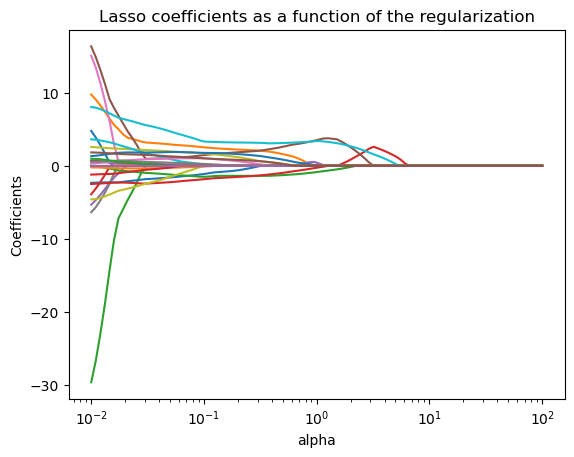

In [322]:
## LASSO Drop off
alphas_do = 10**np.linspace(-2,2,100)

lasso_do = Lasso()
coefs_do = []

for a in alphas_do:
    lasso_do.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso_do.fit(scale(X_train_do), y_train_do)
    coefs_do.append(lasso_do.coef_)

ax = plt.gca()
ax.plot(alphas_do, coefs_do)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train_.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [323]:
# find the best alpha via CV with selected scoring metric
lassocv_do = LassoCV(alphas=alphas_do, max_iter=10000)
lassocv_do.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv_do.alpha_)

The best alpha from LassoCV: 0.7924828983539177


In [324]:
# with the best alpha
lasso_do.set_params(alpha=lassocv_do.alpha_)
lasso_do.fit(scale(X_train_do), y_train_do)
print('The coefficients are:')
print(pd.Series(lasso_do.coef_.flatten(), index=X_train_do.columns))

The coefficients are:
tempmax                   0.000000
tempmin                   0.555438
temp                      0.000000
feelslikemax              0.000000
feelslikemin              0.357626
feelslike                 3.190798
dew                       0.000000
humidity                 -0.000000
precip                    0.000000
precipprob               -0.000000
precipcover              -0.000000
snow                     -0.000000
snowdepth                -1.031216
windspeed                -0.512810
winddir                  -0.000000
sealevelpressure         -0.000000
cloudcover                0.000000
visibility               -0.000000
solarradiation            0.000000
solarenergy               3.282287
uvindex                   0.312981
moonphase                 0.000000
icon_partly-cloudy-day    0.000000
icon_rain                -0.000000
icon_snow                -0.000000
icon_wind                 0.000000
dtype: float64


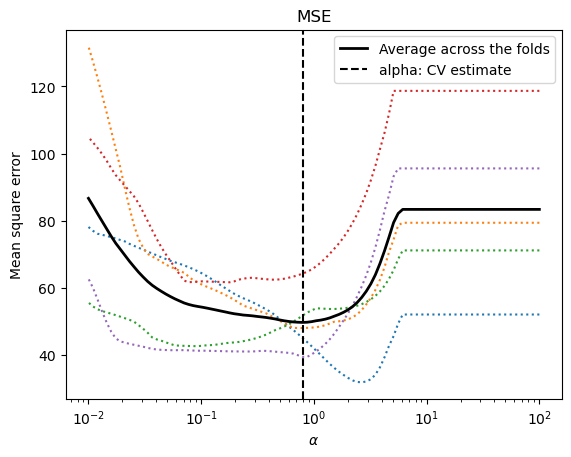

In [325]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [326]:
y_pred_do=lasso_do.predict(scale(X_test_do.values))
mse_do = round(mean_squared_error(y_test_do, y_pred_do),3)
print(f"MSE is {mse_do}")

MSE is 43.816


In [327]:
y_pred=lasso.predict(scale(X_test.values))
print(y_pred)

[ 0.82052824 23.92173701 15.64794607 12.3077313   7.11165133  8.30858229
 14.06386421  8.35263757  7.3781655   4.14567413 15.58863662  6.25827793
 17.49314246 20.69810045 19.91647801 21.68649593 11.35043876 15.40358917
  6.59500054 19.97271225  9.75802388 15.2774146   9.40343298 15.27084502
 20.79752721  8.5452416  18.26919639 20.21390146  4.08594993 12.3262113
 12.48325298  0.47834415 16.60005292 12.76707503 12.49150451  5.21052439
 10.11890287 19.12156387 19.73519021  4.65310508 11.21544177 13.67467986
 18.03124219 10.87789109 14.11922269 17.45287225]


In [328]:
lassocv_do = LassoCV(alphas=alphas)
lassocv.fit(scale(X_train_do), y_train_do)

print('The best alpha from LassoCV:', lassocv.alpha_)

C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8987462548534495, tolerance: 0.6303428571428572
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1503888331717462, tolerance: 0.6303428571428572
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4574481178729002, tolerance: 0.6303428571428572
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklea

The best alpha from LassoCV: 1.0476157527896652


C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0580773279471032, tolerance: 0.6154982456140351
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5854349300620925, tolerance: 0.6154982456140351
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4539572020025844, tolerance: 0.6154982456140351
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\imdim\Documents\anaconda3\lib\site-packages\sklea

## Above is value of MSE obtained from the LASSO

## KNN for 21st St & Pennsylvania Ave NW PICK -UP

In [329]:
# pickup
y = df_m_pu['pu_ct']
X = df_m_pu.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,0.889,100,...,77.2,6.2,6.3,0.0,0,0.00,0,0,1,0
3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0
4,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,88.1,9.9,145.6,5.3,4,0.09,0,0,1,0


In [330]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

In [331]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
mse_train = [-1]*30
mse_test = [-1]*30
for K in range(30):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train, y_train)  #fit the model
    mse_train[K] = mean_squared_error(y_train, model.predict(X_train))
    mse_test[K] = mean_squared_error(y_test, model.predict(X_test))

In [332]:
# optimal k
np.argmin(mse_test)+1

8

In [333]:
# optimal MSE
min(mse_test)

33.74422554347826

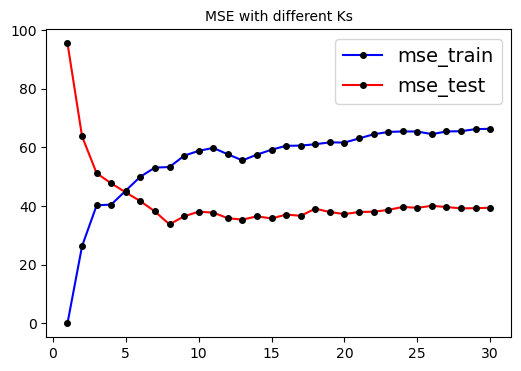

In [334]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(30)+1, mse_train,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(30)+1, mse_test,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=14)
plt.title('MSE with different Ks', fontsize=10)
plt.tick_params(labelsize=10)
plt.show()

## KNN  for21st St & Pennsylvania Ave NW Drop-off

In [335]:
# drop off
y_do = df_m_do['do_ct']
X_do = df_m_do.drop('do_ct',axis=1)
X_do = pd.get_dummies(data=X_do, drop_first=True)
X_do.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,0.889,100,...,77.2,6.2,6.3,0.0,0,0.00,0,0,1,0
3,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
4,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0


In [336]:
X_train_do,X_test_do, y_train_do,y_test_do = train_test_split(X_do,y_do, test_size=0.4, random_state = 200)

In [337]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
mse_train_do= [-1]*30
mse_test_do = [-1]*30
for K in range(30):
    model= neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train_do, y_train_do)  #fit the model
    mse_train_do[K] = mean_squared_error(y_train_do, model.predict(X_train_do))
    mse_test_do[K] = mean_squared_error(y_test_do, model.predict(X_test_do))

In [338]:
# optimal k
np.argmin(mse_test_do)+1

5

In [339]:
# optimal MSE
min(mse_test_do)

60.203333333333326

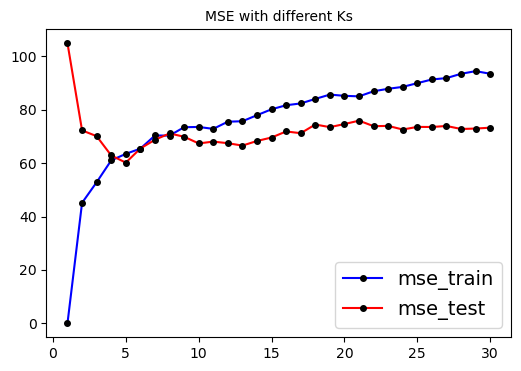

In [340]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(30)+1, mse_train_do,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train')
plt.plot(np.arange(30)+1, mse_test_do,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test')
plt.legend(fontsize=14)
plt.title('MSE with different Ks', fontsize=10)
plt.tick_params(labelsize=10)
plt.show()

## Below are the codes of   Ridge method:  For 21st St & Pennsylvania Ave NW PICK UP

In [341]:
# pickup
y = df_m_pu['pu_ct']
X = df_m_pu.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,0.889,100,...,77.2,6.2,6.3,0.0,0,0.00,0,0,1,0
3,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0
4,42.9,36.9,39.8,40.6,29.5,35.3,24.2,55.0,0.000,0,...,88.1,9.9,145.6,5.3,4,0.09,0,0,1,0


In [342]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

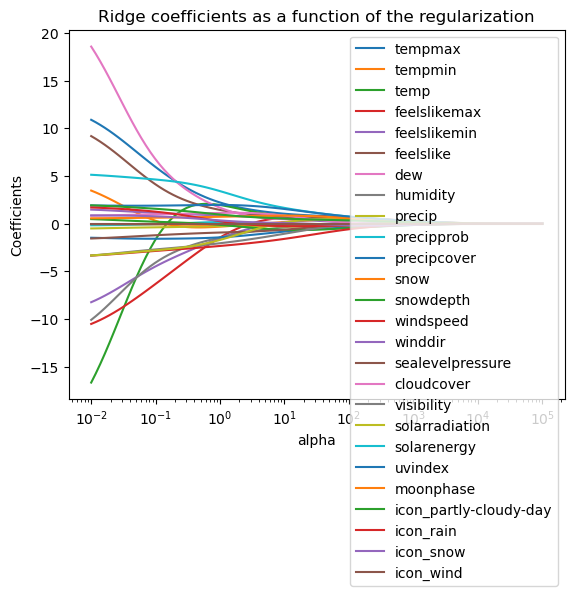

In [343]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [344]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [345]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.258847
tempmin                   0.199451
temp                      0.240523
feelslikemax              0.255292
feelslikemin              0.214795
feelslike                 0.244293
dew                       0.161576
humidity                 -0.073548
precip                   -0.113853
precipprob               -0.092732
precipcover              -0.140055
snow                     -0.114542
snowdepth                -0.141057
windspeed                -0.093619
winddir                   0.030979
sealevelpressure         -0.018822
cloudcover               -0.026863
visibility                0.061176
solarradiation            0.182837
solarenergy               0.235042
uvindex                   0.221777
moonphase                 0.103182
icon_partly-cloudy-day    0.131633
icon_rain                -0.038435
icon_snow                -0.127854
icon_wind                 0.000000
dtype: float64


In [346]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 65.79332246575676


In [347]:
y_pred=ridgecv.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 31.032


## Ridge method: For 21st St & Pennsylvania Ave NW Drop off

In [348]:
# drop off
y_do = df_m_do['do_ct']
X_do = df_m_do.drop('do_ct',axis=1)
X_do = pd.get_dummies(data=X_do, drop_first=True)
X_do.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,0.889,100,...,77.2,6.2,6.3,0.0,0,0.00,0,0,1,0
3,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
4,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0


In [349]:
X_train_do,X_test_do, y_train_do,y_test_do = train_test_split(X_do,y_do, test_size=0.4, random_state = 200)

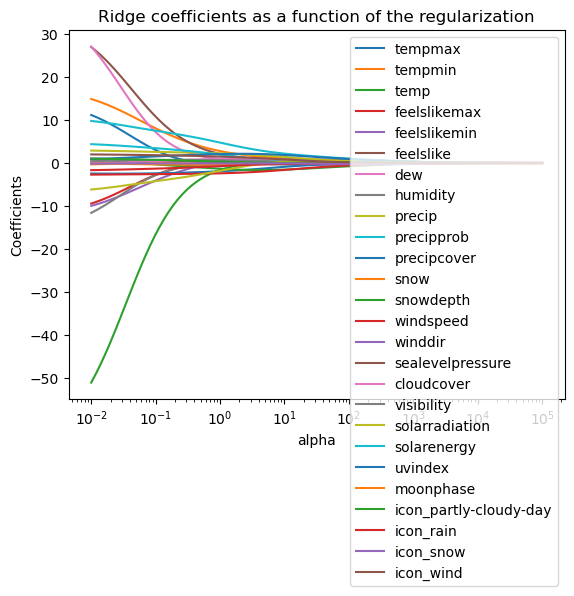

In [350]:
##Ridge drop off
alphas_do = 10**np.linspace(-2,5,100)

ridge_do = Ridge()
coefs_do = []

for a in alphas_do:
    ridge_do.set_params(alpha=a)
    ridge_do.fit(scale(X_train_do), y_train_do)
    coefs_do.append(ridge_do.coef_)

ax = plt.gca()
ax.plot(alphas_do, coefs_do)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X_do.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [351]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler_do = StandardScaler().fit(X_train_do)

In [352]:
# set a large alpha to get smaller coefficients
ridge_do = Ridge(alpha=1000)
ridge_do.fit(scaler_do.transform(X_train_do), y_train_do)


print('The coefficients are:')
print(pd.Series(ridge_do.coef_.flatten(), index=X_train_do.columns))

The coefficients are:
tempmax                   0.295143
tempmin                   0.262055
temp                      0.279468
feelslikemax              0.297632
feelslikemin              0.265070
feelslike                 0.286310
dew                       0.200909
humidity                 -0.069020
precip                   -0.011522
precipprob               -0.078239
precipcover              -0.098449
snow                     -0.141635
snowdepth                -0.199560
windspeed                -0.105978
winddir                  -0.032831
sealevelpressure         -0.020416
cloudcover               -0.033252
visibility                0.050916
solarradiation            0.205365
solarenergy               0.296557
uvindex                   0.270233
moonphase                 0.036803
icon_partly-cloudy-day    0.127306
icon_rain                -0.019229
icon_snow                -0.166372
icon_wind                 0.020344
dtype: float64


In [353]:
# find the best alpha via CV with selected scoring metric
ridgecv_do = RidgeCV(alphas=alphas_do, scoring='neg_mean_squared_error')
ridgecv_do.fit(scale(X_train_do), y_train_do)


print('The best alpha from RidgeCV:', ridgecv_do.alpha_)

The best alpha from RidgeCV: 91.11627561154887


In [354]:
y_pred_do=ridgecv_do.predict(scale(X_test_do.values))
mse_do = round(mean_squared_error(y_test_do, y_pred_do),3)
print(f"MSE is {mse_do}")

MSE is 45.02


## Elastic Regression for   21st St & Pennsylvania Ave   PICK UP

In [355]:
## Elastic Net
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.8423899729961688


In [356]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)


EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.861469
tempmin                   0.266375
temp                      0.704586
feelslikemax              0.806870
feelslikemin              0.424762
feelslike                 0.764944
dew                       0.194916
humidity                 -0.000000
precip                   -0.090745
precipprob               -0.000000
precipcover              -0.458301
snow                     -0.000000
snowdepth                -0.423528
windspeed                -0.714385
winddir                   0.000000
sealevelpressure         -0.000000
cloudcover                0.000000
visibility               -0.000000
solarradiation            0.167506
solarenergy               1.101774
uvindex                   1.032898
moonphase                 0.610440
icon_partly-cloudy-day    0.345409
icon_rain                -0.000000
icon_snow                -0.000000
icon_wind                 0.000000
dtype: float64


In [357]:
y_pred=ENcv.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 28.391


## Elastic Regression for   21st St & Pennsylvania Ave Drop-Off   

In [358]:
# drop off
y_do = df_m_do['do_ct']
X_do = df_m_do.drop('do_ct',axis=1)
X_do = pd.get_dummies(data=X_do, drop_first=True)
X_do.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
0,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,0.448,100,...,99.5,6.2,21.4,0.6,0,0.99,0,1,0,0
1,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,0.124,100,...,91.6,9.6,47.3,1.7,1,1.00,0,1,0,0
2,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,0.889,100,...,77.2,6.2,6.3,0.0,0,0.00,0,0,1,0
3,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,0.000,0,...,18.7,9.9,153.2,5.4,6,0.02,0,0,1,0
4,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,0.000,0,...,82.6,9.9,63.5,2.2,1,0.05,1,0,0,0


In [359]:
X_train_do,X_test_do, y_train_do,y_test_do = train_test_split(X_do,y_do, test_size=0.4, random_state = 200)

In [360]:
## Elastic Net
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv_do= ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train_do), y_train_do)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 1.0416537784732232


In [361]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train_do), y_train_do)


EN_do=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train_do), y_train_do)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax                   0.714861
tempmin                   0.676185
temp                      0.602646
feelslikemax              0.751377
feelslikemin              0.674009
feelslike                 0.755253
dew                       0.100810
humidity                 -0.000000
precip                    0.000000
precipprob               -0.000000
precipcover              -0.000000
snow                     -0.024925
snowdepth                -0.980634
windspeed                -0.611327
winddir                  -0.033402
sealevelpressure         -0.000000
cloudcover                0.000000
visibility                0.000000
solarradiation            0.315626
solarenergy               1.484841
uvindex                   1.190868
moonphase                 0.000000
icon_partly-cloudy-day    0.106373
icon_rain                -0.000000
icon_snow                -0.068391
icon_wind                 0.000000
dtype: float64


In [362]:
y_pred_do=ENcv.predict(scale(X_test_do.values))
mse = round(mean_squared_error(y_test_do, y_pred_do),3)
print(f"MSE is {mse}")

MSE is 44.231


# Model Prediction using LASSO

## 21st St & Pennsylvania Ave Pick UP

In [363]:
X_test.iloc[[22]]

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
80,44.9,33.9,40.7,36.4,24.2,32.5,19.3,42.4,0.0,0,...,79.3,9.9,81.1,6.9,5,0.88,1,0,0,0


In [364]:
scaler.transform(X_test.iloc[[22]])

array([[-0.74727853, -0.43283599, -0.47674132, -1.08503754, -0.6084945 ,
        -0.69497193, -0.91182135, -1.12378445, -0.50418676, -0.77759319,
        -0.6157826 , -0.29673316, -0.31898644,  1.38634315,  0.99257713,
        -0.99310404,  0.34822631,  0.58910612, -0.14989657, -0.08393606,
         0.19319689,  1.12789305,  0.92998111, -0.66143783, -0.38729833,
         0.        ]])

In [365]:
y_pred= lasso.predict(scaler.transform(X_test.iloc[[22]]))
print(y_pred)

[14.30941678]


In [366]:
y_test.iloc[[22]]

80    2
Name: pu_ct, dtype: int64

# 21st St & Pennsylvania Ave Drop-Off

In [367]:
X_test_do.iloc[[22]]

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
65,55.0,43.9,48.6,55.0,36.8,44.8,26.5,42.5,0.0,0,...,83.3,9.9,145.5,12.5,6,0.16,1,0,0,0


In [368]:
y_pred_do = lasso.predict(scaler.transform(X_test_do.iloc[[22]]))
print(y_pred)

[14.30941678]


In [369]:
y_test_do.iloc[[22]]

65    24
Name: do_ct, dtype: int64

## another way with date 

In [370]:
df_pu.iloc[20]# pick up

started_at_date                          2022-01-24
start_station_name    21st St & Pennsylvania Ave NW
pu_ct                                             8
Name: 20, dtype: object

In [371]:
X_test.iloc[[22]]

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
80,44.9,33.9,40.7,36.4,24.2,32.5,19.3,42.4,0.0,0,...,79.3,9.9,81.1,6.9,5,0.88,1,0,0,0


In [372]:
df_do.iloc[23]# dropp off

ended_at_date                          2022-01-24
end_station_name    21st St & Pennsylvania Ave NW
do_ct                                           9
Name: 23, dtype: object

In [373]:
X_test_do.iloc[[23]]

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon_partly-cloudy-day,icon_rain,icon_snow,icon_wind
93,55.9,48.5,51.6,55.9,45.1,50.8,44.8,78.5,0.632,100,...,97.9,8.1,31.2,2.7,1,0.09,0,1,0,0


### second date 

In [378]:
df_pu.iloc[99]#pickup

started_at_date                          2022-04-15
start_station_name    21st St & Pennsylvania Ave NW
pu_ct                                            19
Name: 99, dtype: object

In [381]:
df_do.iloc[103]# dropp off

ended_at_date                          2022-04-15
end_station_name    21st St & Pennsylvania Ave NW
do_ct                                          32
Name: 103, dtype: object